# 3.3 Flaws in Frequentist Inference

### Setup

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Load data

In [3]:
prostate = pd.read_csv("../data/prostmat.csv")

In [4]:
prostate.head()

,control,control.1,control.2,control.3,control.4,control.5,control.6,control.7,control.8,control.9,...,cancer.42,cancer.43,cancer.44,cancer.45,cancer.46,cancer.47,cancer.48,cancer.49,cancer.50,cancer.51
0,-0.930895,-0.751885,-0.545781,-1.078519,-0.994677,0.015547,-0.853963,4.016860,-0.399641,-1.085050,...,-0.845358,0.936035,-0.819505,-0.849670,0.434865,2.054122,2.799498,1.294162,2.905588,3.434504
1,-0.839996,-0.848271,-0.851687,-0.159610,-0.751905,-0.516436,-0.826845,-0.832741,-0.840731,-0.824386,...,0.563857,-0.439367,2.052858,0.441992,0.675806,-0.450853,1.385720,-1.143997,-0.282119,-1.174233
2,0.062508,0.102895,-0.003043,0.215347,-1.163109,1.028130,-0.476408,-1.154759,-1.161665,-0.690671,...,-0.007371,0.629820,-1.107093,-0.968790,-0.235357,-1.049600,1.186599,0.962634,-0.026753,1.533532
3,-0.361594,2.421034,-0.122089,-0.096277,-1.130144,0.458272,0.633883,0.069708,-1.128592,-0.429663,...,-0.508988,-0.409035,0.557853,-0.900065,1.491239,0.553022,0.118476,1.220066,-1.138651,0.174831
4,-1.124427,0.182211,0.837907,1.050548,1.695673,3.463900,-1.109246,-0.310570,-0.105437,-1.072878,...,0.524438,-1.172145,0.936470,0.683947,-0.618465,3.995967,0.115477,-1.167392,-1.195660,-0.203642


For comparing our z-value calculations, we'll also load the book's z-values

In [5]:
prostz = pd.read_csv("../data/prostz.txt", header=None, names=["z"])

In [6]:
prostz.head()

,z
0,1.472367
1,3.572915
2,-0.027754
3,-1.132052
4,-0.140221


### Figure 3.3

The graphed values and the timing of getting the value 1.645 are likely random, so we won't try to reproduce those

### Effect estimates for Figure 3.4

Note $\dagger_4$ on page 37 shows how to calculate the effect estimates $x_i$: get the two-sample t statistic, then $x_i = \Phi^{-1}(F_{100}(t_i))$, with $\Phi$ being the cumulative normal distribution and $F_{100}$ being the cumulative t distribution with 100 degrees of freedom

In [7]:
cols_control = [col for col in prostate.columns if col.startswith("control")]
cols_cancer = [col for col in prostate.columns if col.startswith("cancer")]

In [8]:
phi_inv = stats.norm.ppf
f100 = stats.t(df=100).cdf

In [9]:
z_values = []
for _, row in prostate.iterrows():
    values_control = row[cols_control].values
    values_cancer = row[cols_cancer].values
    t, _  = stats.ttest_ind(values_cancer, values_control, equal_var=False)
    z = phi_inv(f100(t))
    z_values.append(z)

The book has a dataset containing the z values, which we've already read into the `prostz` DataFrame. We can compare and make sure we calculated them correctly

In [10]:
(prostz.z - z_values).abs().max()

2.26867413744003e-10

The extreme value:

In [11]:
print("x_610: {:>1.2f}".format(z_values[609]))

x_610: 5.29


We could also calculate the value $\hat{\mu}_{610} = 4.11$ using the "more appropriate uninformative prior" (pg 33), but we'll skip that

### Figure 3.4

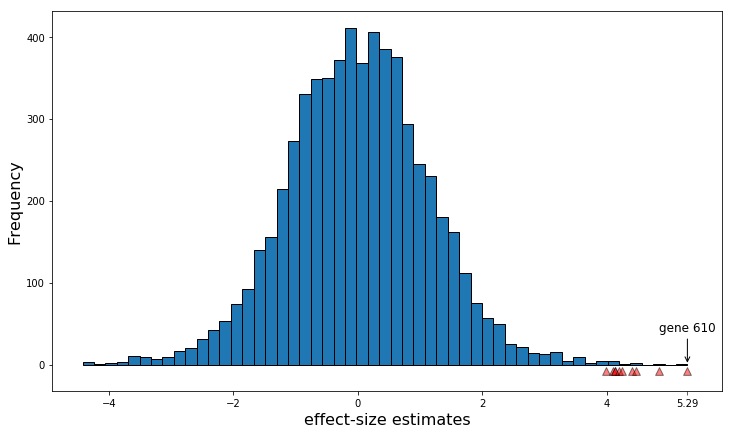

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.hist(z_values, bins=53, edgecolor="k")
ax.scatter(
    sorted(z_values)[-10:],
    [-7] * 10,
    s=60,
    marker="^",
    c="r",
    edgecolor="k",
    alpha=0.5,
)
ax.annotate(
    "gene 610",
    size=12,
    xy=(z_values[609], 0),
    xytext=(z_values[609], 40),
    arrowprops=dict(arrowstyle="->", facecolor="black"),
    horizontalalignment="center",
)

ax.set_xticks([z_values[609]], minor=True)
ax.set_xticklabels([z_values[609].round(2)], minor=True)
ax.tick_params(axis='both', which='minor', length=4)

ax.set_xlabel("effect-size estimates", size=16)
ax.set_ylabel("Frequency", size=16);

The bins aren't quite right, but this is close.